In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
from sklearn import metrics
import pickle
%matplotlib inline

In [55]:
#Read Data
data = pd.read_csv('../../RealData/RealData_Small.csv')
#data = pd.read_csv('../../SynData/data/GeneratedData.csv')


In [56]:
#General data info
data.head()

,Unnamed: 0,CPU,MEM,throughput
0,0,0.1,64.0,517.21
1,1,0.1,64.0,521.33
2,2,0.1,64.0,510.55
3,3,0.1,64.0,512.59
4,4,0.1,64.0,494.36


In [57]:
data.describe()

,Unnamed: 0,CPU,MEM,throughput
count,200.000000,200.000000,200.0,199.000000
mean,99.500000,0.550000,64.0,1868.726231
std,57.879185,0.287949,0.0,584.920042
min,0.000000,0.100000,64.0,494.360000
25%,49.750000,0.300000,64.0,1641.545000
50%,99.500000,0.550000,64.0,2193.670000
75%,149.250000,0.800000,64.0,2225.220000
max,199.000000,1.000000,64.0,2292.520000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Unnamed: 0    200 non-null int64
CPU           200 non-null float64
MEM           200 non-null float64
throughput    199 non-null float64
dtypes: float64(3), int64(1)
memory usage: 6.3 KB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


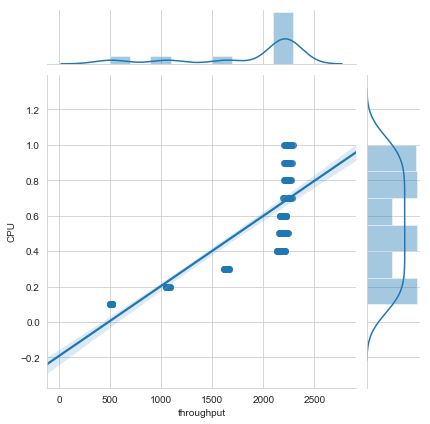

In [59]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="reg")


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


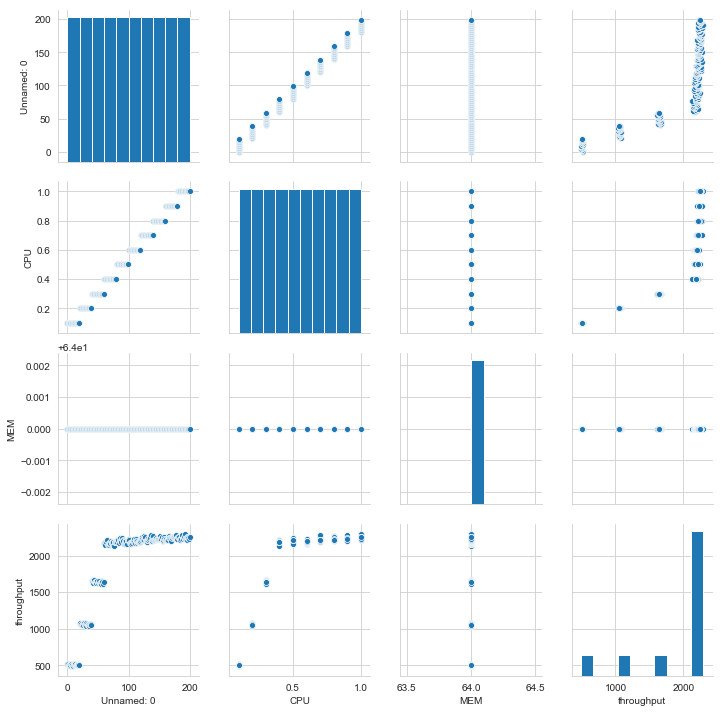

In [60]:
sns.pairplot(data)


In [61]:
data['throughput'].corr(data['CPU'])


0.8061384104802221

In [62]:
datalm = data


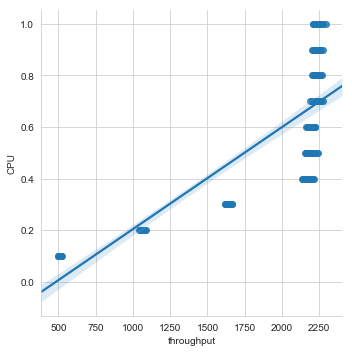

In [63]:
sns.lmplot(x='throughput',y='CPU',data=datalm)


In [91]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
lm = LinearRegression()
n = len(X)
kf = KFold(n_splits=5)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
lm.fit(X_train,y_train)

KeyError: '[1.00000e-01 2.00000e-01 3.00000e-01 4.00000e-01 5.00000e-01 6.00000e-01\n 7.00000e-01 8.00000e-01 9.00000e-01 1.00000e+00 4.94360e+02 4.98380e+02\n 5.01830e+02 5.02000e+02 5.04390e+02 5.04470e+02 5.05270e+02 5.06460e+02\n 5.07220e+02 5.07380e+02 5.10550e+02 5.11770e+02 5.11850e+02 5.11960e+02\n 5.12590e+02 5.15020e+02 5.17210e+02 5.18220e+02 5.18890e+02 5.21330e+02\n 1.04260e+03 1.04398e+03 1.04732e+03 1.05012e+03 1.05632e+03 1.05679e+03\n 1.05680e+03 1.05755e+03 1.05893e+03 1.05977e+03 1.06000e+03 1.06122e+03\n 1.06173e+03 1.06469e+03 1.06584e+03 1.06998e+03 1.07013e+03 1.07394e+03\n 1.08182e+03 1.08420e+03 1.61507e+03 1.61817e+03 1.62612e+03 1.62705e+03\n 1.62900e+03 1.62904e+03 1.63157e+03 1.63606e+03 1.63650e+03 1.64143e+03\n 1.64166e+03 1.64384e+03 1.64581e+03 1.64753e+03 1.64790e+03 1.64837e+03\n 1.65019e+03 1.65213e+03 1.66417e+03 1.66738e+03 2.13169e+03 2.13777e+03\n 2.13838e+03 2.13959e+03 2.14997e+03 2.15592e+03 2.16001e+03 2.16029e+03\n 2.16138e+03 2.16163e+03 2.16286e+03 2.16381e+03 2.16464e+03 2.16491e+03\n 2.16831e+03 2.17200e+03 2.17400e+03 2.17435e+03 2.17638e+03 2.17639e+03\n 2.17645e+03 2.17812e+03 2.17871e+03 2.17907e+03 2.18039e+03 2.18067e+03\n 2.18162e+03 2.18274e+03 2.18567e+03 2.18585e+03 2.18598e+03 2.18618e+03\n 2.18633e+03 2.18722e+03 2.18856e+03 2.19032e+03 2.19255e+03 2.19306e+03\n 2.19360e+03 2.19367e+03 2.19489e+03 2.19700e+03 2.19747e+03 2.19890e+03\n 2.19953e+03 2.20055e+03 2.20153e+03 2.20186e+03 2.20213e+03 2.20348e+03\n 2.20359e+03 2.20616e+03 2.20637e+03 2.20647e+03 2.20694e+03 2.20758e+03\n 2.20830e+03 2.20947e+03 2.20997e+03 2.21018e+03 2.21033e+03 2.21151e+03\n 2.21202e+03 2.21217e+03 2.21236e+03 2.21355e+03 2.21459e+03 2.21498e+03\n 2.21522e+03 2.21559e+03 2.21570e+03 2.21688e+03 2.21710e+03 2.21801e+03\n 2.21804e+03 2.21908e+03 2.21930e+03 2.22084e+03 2.22092e+03 2.22195e+03\n 2.22204e+03 2.22224e+03 2.22270e+03 2.22277e+03 2.22312e+03 2.22359e+03\n 2.22372e+03 2.22502e+03 2.22542e+03 2.22580e+03 2.22636e+03 2.22641e+03\n 2.22686e+03 2.22742e+03 2.22863e+03 2.22918e+03 2.22950e+03 2.22980e+03\n 2.23323e+03 2.23352e+03 2.23359e+03 2.23508e+03 2.23565e+03 2.23639e+03\n 2.23694e+03 2.23730e+03 2.23858e+03 2.24142e+03 2.24155e+03 2.24327e+03\n 2.24671e+03 2.24819e+03 2.24831e+03 2.24927e+03 2.24934e+03 2.24979e+03\n 2.25069e+03 2.25159e+03 2.25207e+03 2.25322e+03 2.25509e+03 2.25521e+03\n 2.25645e+03 2.25779e+03 2.25796e+03 2.25817e+03 2.25833e+03 2.25911e+03\n 2.25919e+03 2.26088e+03 2.26091e+03 2.26226e+03 2.26833e+03 2.26922e+03\n 2.27454e+03 2.27636e+03 2.27695e+03 2.29252e+03         nan] not in index'

In [88]:
#Test data prediction
prediction = lm.predict(X_test)
X_test = np.array(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Throuput':X_test.flatten(),'Actual_CPU': y_test.flatten(), 'Predicted_CPU': prediction.flatten()})
df

,Throuput,Actual_CPU,Predicted_CPU
0,2218.040000,0.9,0.590954
1,2222.700000,0.9,0.592447
2,2207.580000,0.9,0.587604
3,2243.270000,0.9,0.599035
4,2213.550000,0.9,0.589516
5,2262.260000,0.9,0.605118
6,2241.420000,0.9,0.598443
7,2235.650000,0.9,0.596595
8,2201.530000,0.9,0.585666
9,2255.210000,0.9,0.602860


Text(0, 0.5, 'Predicted Y')

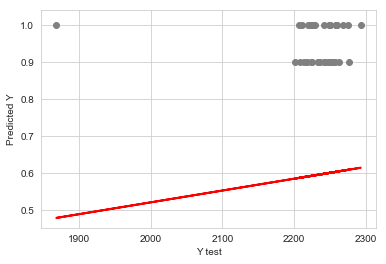

In [89]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")


In [49]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 0.35466141464422934
MSE: 0.1289048900174571
RMSE: 0.35903327146304576


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


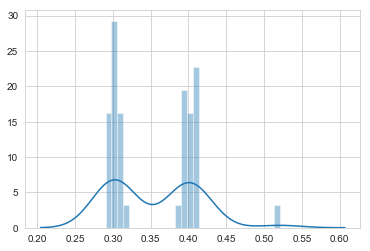

In [50]:
#Residuals
sns.distplot(y_test-prediction,bins=30)

In [51]:
# save the model to disk
filename = '../models/linearReg_model.sav'
pickle.dump(lm, open(filename, 'wb'))

In [52]:
data = scaler.transform(np.float32([[10]])) 
print(data)

[[-26.936424]]


In [53]:
lm.predict([[0]])

array([0.0388534])